In [4]:
#A) Calcular a média, o desvio padrão e a variância, para 20 amostras, 3 bandas (RGB) e média das 3;
import cv2
import numpy as np

# Função para calcular a média, desvio padrão e variância de uma imagem
def calcular_estatisticas_imagem(imagem):
    imagem_float = np.float32(imagem)
    media = np.mean(imagem_float, axis=(0, 1))
    desvio_padrao = np.std(imagem_float, axis=(0, 1))
    variancia = np.var(imagem_float, axis=(0, 1))
    return media, desvio_padrao, variancia

# Carregando as 20 imagens e calculando as estatísticas
imagens = []
for i in range(1, 21):
    imagem = cv2.imread(fr'D:\Nova pasta\({i}).png')
    imagens.append(imagem)

# Convertendo a lista de imagens para um array numpy
imagens = np.array(imagens)

# Calculando as estatísticas para as 20 imagens
medias = []
desvios_padrao = []
variancias = []
for imagem in imagens:
    media, desvio_padrao, variancia = calcular_estatisticas_imagem(imagem)
    medias.append(media)
    desvios_padrao.append(desvio_padrao)
    variancias.append(variancia)

# Convertendo as listas para arrays numpy
medias = np.array(medias)
desvios_padrao = np.array(desvios_padrao)
variancias = np.array(variancias)

# Calculando a média das médias, desvios padrão e variâncias
media_total = np.mean(medias, axis=0)
desvio_padrao_total = np.mean(desvios_padrao, axis=0)
variancia_total = np.mean(variancias, axis=0)

# Imprimindo os resultados
print("Média das 3 bandas RGB:")
print(media_total)
print("\nDesvio padrão das 3 bandas RGB:")
print(desvio_padrao_total)
print("\nVariância das 3 bandas RGB:")
print(variancia_total)

Média das 3 bandas RGB:
[29.191528 61.802113 74.61702 ]

Desvio padrão das 3 bandas RGB:
[16.110416 24.412697 39.455845]

Variância das 3 bandas RGB:
[ 274.29755  625.4845  1608.033  ]


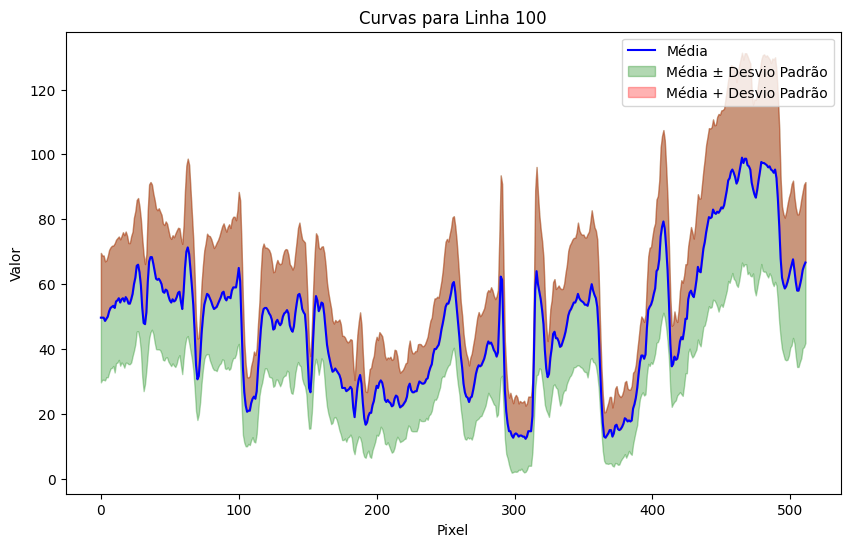

In [10]:
#B) b) Escolher uma determinada linha da imagem e plotar um gráfico mostrando, 
# para cada pixel dessa linha, duas curvas: média mais desvio padrão; 
# média menos desvio padrão (também 3 bandas e média das 3).

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def plot_pixel_line(image_path, line_number):
    image = Image.open(image_path)
    width, height = image.size
    if line_number >= height:
        print("Número da linha está fora dos limites da imagem.")
        return

    # Converter a imagem para um array numpy
    image_array = np.array(image)

    # Obter a linha específica da imagem
    pixel_line = image_array[line_number, :, :]

    # Calcular a média e o desvio padrão de cada pixel na linha
    mean_line = np.mean(pixel_line, axis=1)
    std_line = np.std(pixel_line, axis=1)

    # Calcular as curvas média + desvio padrão e média - desvio padrão
    upper_curve = mean_line + std_line
    lower_curve = mean_line - std_line

    # Plotar as curvas
    plt.figure(figsize=(10, 6))
    plt.plot(mean_line, label='Média', color='blue')
    plt.fill_between(range(width), lower_curve, upper_curve, alpha=0.3, color='green', label='Média ± Desvio Padrão')
    plt.fill_between(range(width), mean_line, upper_curve, alpha=0.3, color='red', label='Média + Desvio Padrão')
    plt.xlabel('Pixel')
    plt.ylabel('Valor')
    plt.title(f'Curvas para Linha {line_number}')
    plt.legend()
    plt.show()

# Caminho da imagem PNG
image_path = r'D:\Nova pasta\(1).png'

# Número da linha que deseja plotar
line_number = 100

# Chamar a função para plotar o gráfico da linha especificada
plot_pixel_line(image_path, line_number)

Nome do arquivo: (11).png
Resolução: 512 x 512
Modo de cor: RGB
Nível mínimo de cinza para cada canal:
Canal R: 0
Canal G: 0
Canal B: 0
Nível máximo de cinza para cada canal:
Canal R: 255
Canal G: 243
Canal B: 239
Taxa de amostragem máxima da câmera: None
-----------------------------


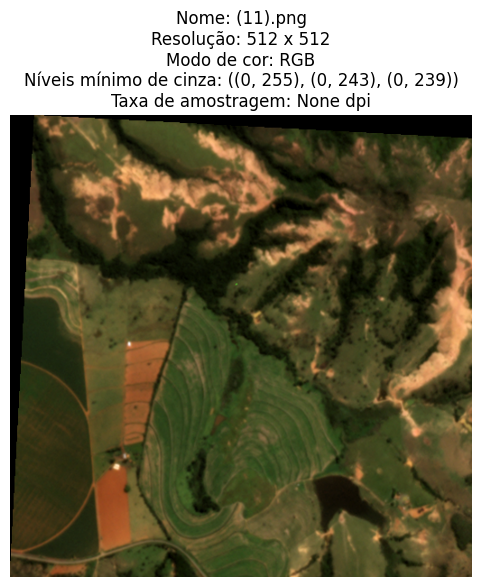

Nome do arquivo: (16).png
Resolução: 512 x 512
Modo de cor: RGB
Nível mínimo de cinza para cada canal:
Canal R: 19
Canal G: 20
Canal B: 8
Nível máximo de cinza para cada canal:
Canal R: 206
Canal G: 152
Canal B: 80
Taxa de amostragem máxima da câmera: None
-----------------------------


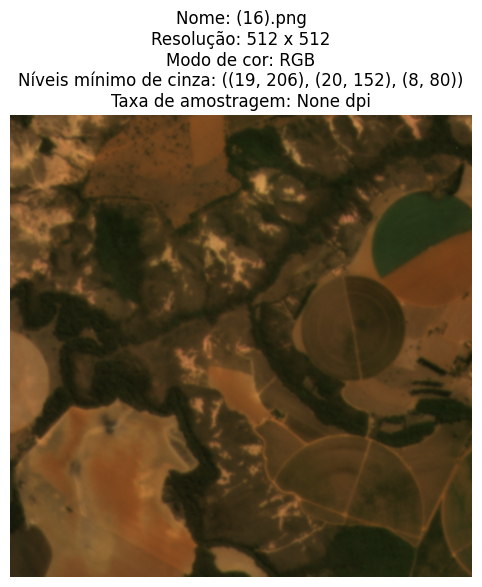

Nome do arquivo: (24).png
Resolução: 512 x 512
Modo de cor: RGB
Nível mínimo de cinza para cada canal:
Canal R: 0
Canal G: 0
Canal B: 0
Nível máximo de cinza para cada canal:
Canal R: 255
Canal G: 245
Canal B: 212
Taxa de amostragem máxima da câmera: None
-----------------------------


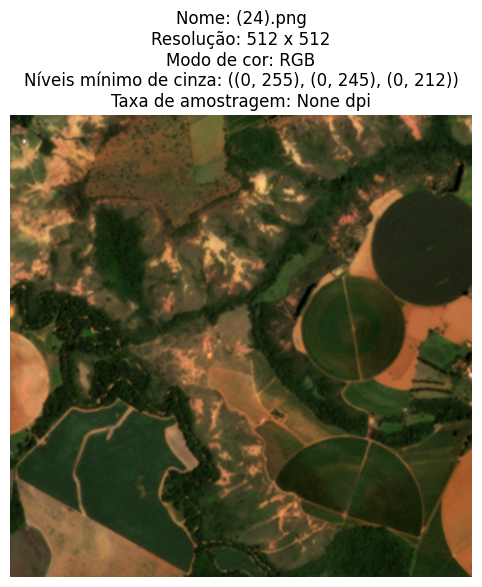

Nome do arquivo: (1).png
Resolução: 512 x 512
Modo de cor: RGB
Nível mínimo de cinza para cada canal:
Canal R: 0
Canal G: 0
Canal B: 0
Nível máximo de cinza para cada canal:
Canal R: 255
Canal G: 244
Canal B: 228
Taxa de amostragem máxima da câmera: None
-----------------------------


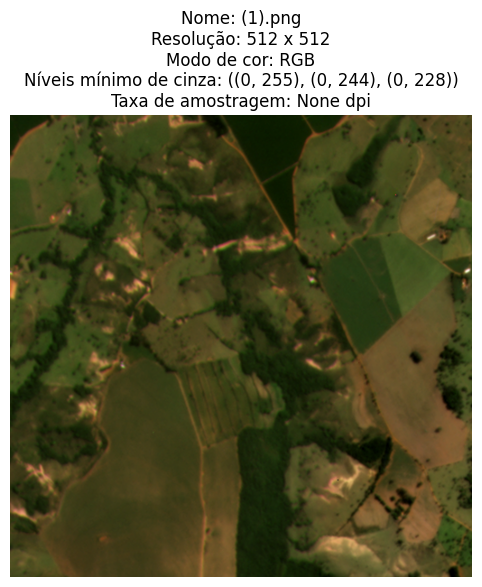

Nome do arquivo: (17).png
Resolução: 512 x 512
Modo de cor: RGB
Nível mínimo de cinza para cada canal:
Canal R: 21
Canal G: 21
Canal B: 7
Nível máximo de cinza para cada canal:
Canal R: 231
Canal G: 170
Canal B: 134
Taxa de amostragem máxima da câmera: None
-----------------------------


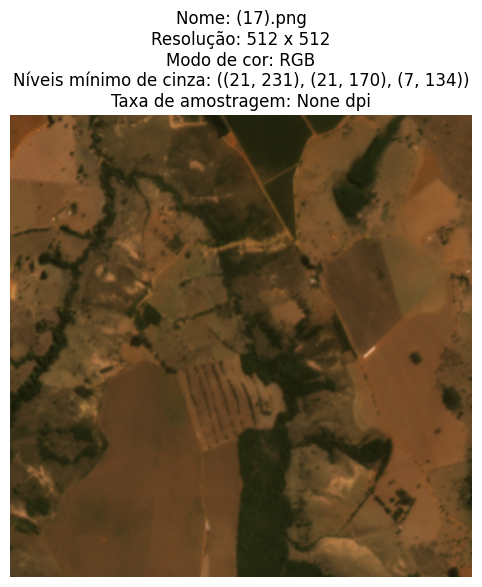

In [22]:
#C) Indique outros dados da imagem (nível de cinza mínimo para cada cor, 
# nível máximo para cada cor, mostre 5 imagens das 20 adquiridas, 
# taxa de amostragem máxima da câmera, resolução, etc).

from PIL import Image
import os
import random
import matplotlib.pyplot as plt
# Defina o caminho para a pasta onde suas imagens estão
caminho_pasta = r'D:\Nova pasta'
numero_de_imagens = 5

def analisar_imagens_aleatorias(pasta, num_imagens):
    # Lista todos os arquivos na pasta
    arquivos = os.listdir(pasta)

    # Filtra apenas os arquivos PNG
    arquivos_png = [arquivo for arquivo in arquivos if arquivo.endswith(".png")]

    # Seleciona aleatoriamente 5 imagens da lista
    imagens_aleatorias = random.sample(arquivos_png, num_imagens)

    # Para cada imagem selecionada
    for arquivo in imagens_aleatorias:
        # Abre a imagem
        imagem = Image.open(os.path.join(pasta, arquivo))

        # Obtem informações sobre a imagem
        largura, altura = imagem.size
        modo = imagem.mode
        extrema = imagem.getextrema()

        # Imprime informações sobre a imagem
        print("Nome do arquivo:", arquivo)
        print("Resolução:", largura, "x", altura)
        print("Modo de cor:", modo)
        print("Nível mínimo de cinza para cada canal:")
        for i, cor in enumerate(modo):
            print(f"Canal {cor}: {extrema[i][0]}")
        print("Nível máximo de cinza para cada canal:")
        for i, cor in enumerate(modo):
            print(f"Canal {cor}: {extrema[i][1]}")
        print("Taxa de amostragem máxima da câmera:", imagem.info.get("dpi"))
        print("-----------------------------")

        # Plotar a imagem junto com as informações
        plt.figure(figsize=(8, 6))
        plt.imshow(imagem)
        plt.title(f"Nome: {arquivo}\nResolução: {largura} x {altura}\nModo de cor: {modo}\n"
                  f"Níveis mínimo de cinza: {extrema}\nTaxa de amostragem: {imagem.info.get('dpi')} dpi")
        plt.axis('off')
        plt.show()

        # Fechar a imagem
        imagem.close()

# Chama a função para analisar 5 imagens aleatórias na pasta especificada
analisar_imagens_aleatorias(caminho_pasta, numero_de_imagens)